**Artificial Neural Networks (ANNs)**
1. In this lab session we look at building a simple neuron by using ANN and attempt to classify some nonlinear data
2. We then extend this to a three layered, fully connected ANN and attempt the classification task again
3. We shall then teach our ANN to paint a simple picture (which makes it easier to evaluate its performance - qualitatively) and we shall play with some of its basic hyperparameters (number of layers, neurons per layer, number of epochs, activation functions, etc) until it learns to paint at a satisfactory level

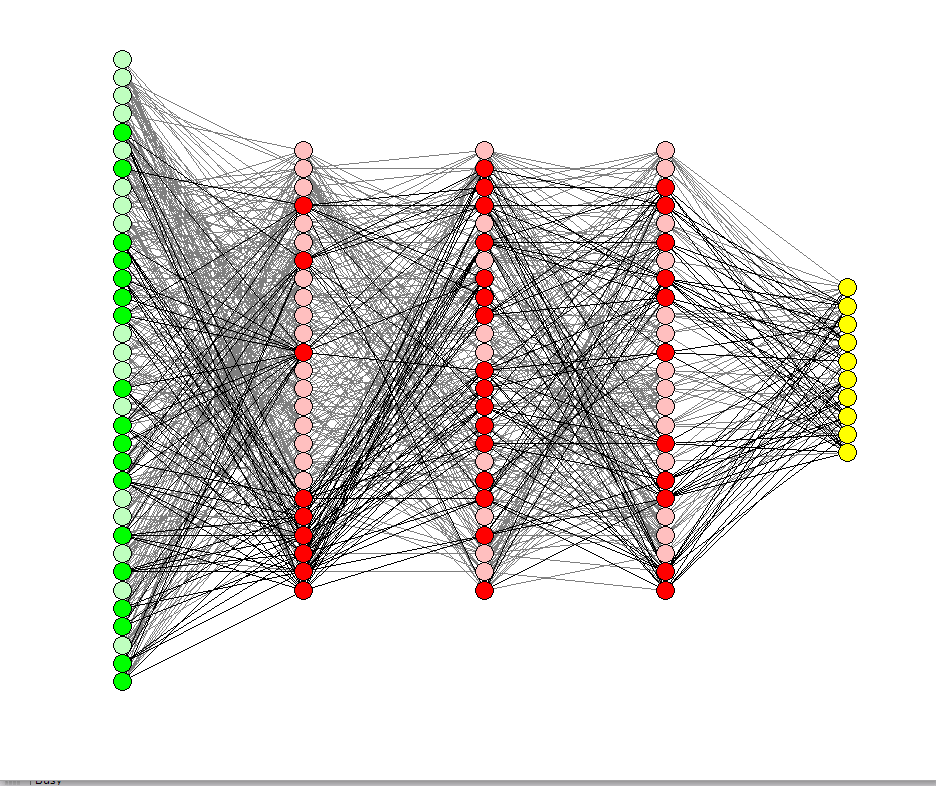

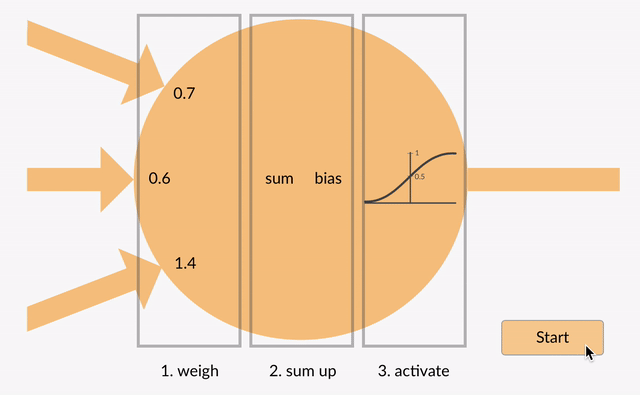

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
#import matplotlib.pyplot as mt

In [ ]:
#Importing dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ODL/data.csv')

In [ ]:
#Check the first 5 rows of the dataset. 
dataset.head(5)
dataset.shape()

In [ ]:
#DATA PREPROCESSING

In [ ]:
#Seperating dependent and independent variables. 

X = dataset.iloc[:, 2:32].values  #Note: Exclude Last column with all NaN values.
y = dataset.iloc[:, 1].values

Use OneHotEncoder when you encounter more than 2 categories of data

In [ ]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y)

In [ ]:
#Splitting into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Keras**
Keras is a high level API for building Artificial Neural Networks. It uses Tensorflow or Theano backend for it’s under-the-hood operations. To install Keras, you must have Tensorflow installed on your machine. Colaboratory has Tensorflow already installed on the VM.

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

The classes Sequential and Dense are used to specify the nodes, connections, specifications of the neural network. As seen in the above section, we will need these to customize our learning network’s parameters and tune them.

In [ ]:
# Initialising the ANN/DNN
classifier = Sequential()

How did we decide that the number of units in the ?  Add the total number of columns in X and y and divide by 2. (30+1)/2 = 15.5 ~ 16. hence , units = 16

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))


In [ ]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#for(i=0;i<=epoch;i++)
#{compilation}

The batch_size is the number of number of inputs you wish to simultaneously process. And the epoch is an entire cycle in which all your data passes through the neural network once

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 98)

Epoch 1/98
46/46 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9626
Epoch 2/98
46/46 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.9692
Epoch 3/98
46/46 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.9538
Epoch 4/98
46/46 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9604
Epoch 5/98
46/46 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9736
Epoch 6/98
46/46 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9626
Epoch 7/98
46/46 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9626
Epoch 8/98
46/46 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9692
Epoch 9/98
46/46 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9648
Epoch 10/98
46/46 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.9582
Epoch 11/98
46/46 [

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
#thershold value = 0 -1

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
#Classification: Confusion matrix, accuracy,precision,recall
#Regression: MSE/RMSE,MAE,R2

array([[70,  1],
       [ 5, 38]])

In [ ]:
# summarize the first 10 cases
for i in range(10):
	print('%s => %d (expected %d)' % (X[i].tolist(), y_pred[i], y[i]))

# **Compute precision, recall, F-measure and support**
**Precision** = tp / (tp + fp),
where tp is the number of true positives 
      fp the number of false positives 
The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

---


**Recall**  = tp / (tp + fn),
 where tp is the number of true positives 
       fn the number of false negatives 
The recall is intuitively the ability of the classifier to find all the positive samples.

---


**F-beta** score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The **F-beta** score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

---


The **support** is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



# **ROC Curve**
The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

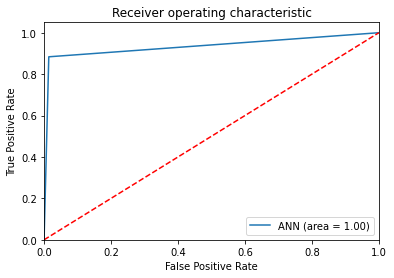

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ANN_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

# **ANN Visualization**

In [ ]:
!pip3 install ann_visualizer
from ann_visualizer.visualize import ann_viz 
ann_viz(classifier,view=True, title="My first neural network")
